In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

#### Loading the data, first look at the data

In [4]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')
print(df.columns)

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')


In [5]:
df.sample(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
18493,1938,The Londonderry Air,British,Alex Bryce,"Sara Allgood, Liam Gaffney",romance,https://en.wikipedia.org/wiki/The_Londonderry_...,A young woman abandons her plans to settle dow...
5222,1950,The Second Woman,American,James V. Kern,"Robert Young, Betsy Drake",film noir,https://en.wikipedia.org/wiki/The_Second_Woman,This psychological thriller tells the story of...
23531,2004,Rice Rhapsody,Hong Kong,Kenneth Bi,"Sylvia Chang, Martin Yan",comedy,https://en.wikipedia.org/wiki/Rice_Rhapsody,The film is set in Singapore's Chinatown. It i...
24244,1938,Bhabhi,Bollywood,Franz Osten,"P. Jairaj, Renuka Devi, Maya Devi, P. F. Pitha...",social family drama,https://en.wikipedia.org/wiki/Bhabhi_(1938_film),Kishore (P. Jairaj) is a morally respectable m...
28882,2017,Sargi,Punjabi,Neeru Bajwa,"Rubina Bajwa, Jassi Gill, Babbal Rai, B.N. Sha...",comedy/drama,https://en.wikipedia.org/wiki/Sargi,Sargi is a romantic love triangle involving Ru...


In [6]:
df.drop(['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis=1, inplace=True)

#### Genres

In [7]:
print('There are {} movies out of {} with unknown genres.'.format(
    df[df.Genre=='unknown'].shape[0] , df.shape[0]
))

movies_wo_genre = df[df.Genre == 'unknown']
df.drop(df[df.Genre == 'unknown'].index, inplace=True)

There are 6083 movies out of 34886 with unknown genres.


In [8]:
# genres were chosen as the words with the highest frequencies (which are also genres)
"""
genres_old = set([
    'western', 'action', 'crime', 'biography', 'comedy', 'drama', 'adventure', 'fantasy', 
    'sports', 'horror', 'historical', 'serial', 'epic', 'mystery', 'romance','war', 'spy', 
    'romcom', 'animation', 'melodrama', 'documentary', 'family', 'thriller', 'musical', 'scifi', 
    'noir', 'disaster', 'political', 'adult', 'satire', 'mockumentary',  'psychological', 
    'martial', 'superhero', 'teen', 'children', 'supernatural', 'social', 'anime'
])
"""

genres = set([
    'comedy', 'scifi', 'horror', 'romance', 'action', 'thriller', 'drama', 
    'crime', 'adventure', 'fantasy', 'children', 'amimation'
])

# we replace the following collocations with genres from our list
replacements = [
    ('science fiction', ' scifi '),
    ('science-fiction' , ' scifi '),
    ('sci fi', 'scifi'),
    ('sci-fi', 'scifi'),
    ('science', ' scifi '),
    ('animated', ' animation '),
    ('romantic comedy', ' romcom romance comedy '),
    ('romantic-comedy', ' romcom romance comedy '),
    ('rom com', ' romcom romance comedy'),
    ('romantic', ' romance '),
    ('superheroes', ' superhero '),
    ('tokusatsu', ' action '),
    ('docudrama', ' documentary drama '),
    ('dramedy', ' drama comedy '),
    ('suspense', 'thriller')
]

def make_list_of_genres(text, replacements=replacements, genres=genres):
    """
    Examples: 
    ----------
    >>> text = 'drama  / comedy-biopick,  fantasy, science-fiction,, animation film'
    >>> make_set_of_genres(text)
    ['drama', 'comedy', 'biography', 'fantasy', 'scifi', 'animation', 'film']
    """

    for replacement in replacements:
        if replacement[0] in text:
            text = text.replace(replacement[0], replacement[1])
    
    # we have words containing 'bio' replaced by 'biography'
    if 'bio' in text:
        text = re.sub(r'\b(bio\w*)', 'biography', text)
    if 'child' in text:
        text = re.sub(r'\b(child\w*)', " children ", text)
    if 'histor' in text:
        text = re.sub(r'\b(histor\w*)', " historical ", text)
        
    # I haven't found any easier way to split by multiple delimiters, including whitespaces 
    # and avoid ''
    result = set(filter(None, re.split(',|/|-|\s|–|;', text))) 
    
    
    return list(result & genres)

In [9]:
# an example of using make_set_of_genres
some_movie_genres = "drama  / comedy-biopic,  fantasy, masala science-fiction,, animation film,,  children's"
make_list_of_genres(some_movie_genres)

['comedy', 'drama', 'fantasy', 'scifi', 'children']

In [10]:
df

,Title,Genre,Plot
6,The Great Train Robbery,western,The film opens with two bandits breaking into ...
7,The Suburbanite,comedy,The film is about a family who move to the sub...
10,Dream of a Rarebit Fiend,short,The Rarebit Fiend gorges on Welsh rarebit at a...
11,From Leadville to Aspen: A Hold-Up in the Rockies,short action/crime western,The film features a train traveling through th...
12,Kathleen Mavourneen,short film,Irish villager Kathleen is a tenant of Captain...
...,...,...,...
34877,Particle (film),drama film,"Zeynep lost her job at weaving factory, and he..."
34882,Çalgı Çengi İkimiz,comedy,"Two musicians, Salih and Gürkan, described the..."
34883,Olanlar Oldu,comedy,"Zafer, a sailor living with his mother Döndü i..."
34884,Non-Transferable,romantic comedy,The film centres around a young woman named Am...


In [11]:
genres_column = df.Genre.apply(make_list_of_genres)

df.Genre = genres_column

# we drop all entries where genre is not in the given list
df.drop(genres_column[genres_column.apply(len) == 0].index, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

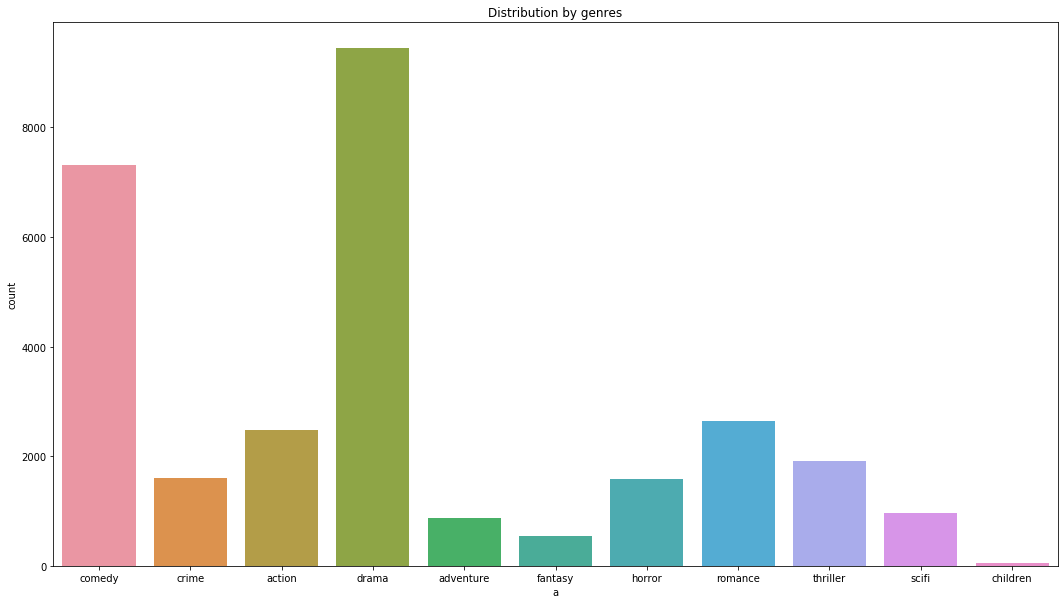

In [12]:
import seaborn as sns
plt.figure(figsize=(18, 10))
plt.title('Distribution by genres')
genres_df = pd.DataFrame({'a':[y for x in df['Genre'] for y in x]})
sns.countplot(x='a', data=genres_df)

In [13]:
# adding columns for one-hot encoding of genre
df = df.join(df.Genre.str.join('|').str.get_dummies())

#### Plot

Some stats for the plot lengths:

count    23852.000000
mean       387.565236
std        313.827841
min          2.000000
25%        128.000000
50%        312.000000
75%        605.000000
max       5130.000000
Name: Plot, dtype: float64


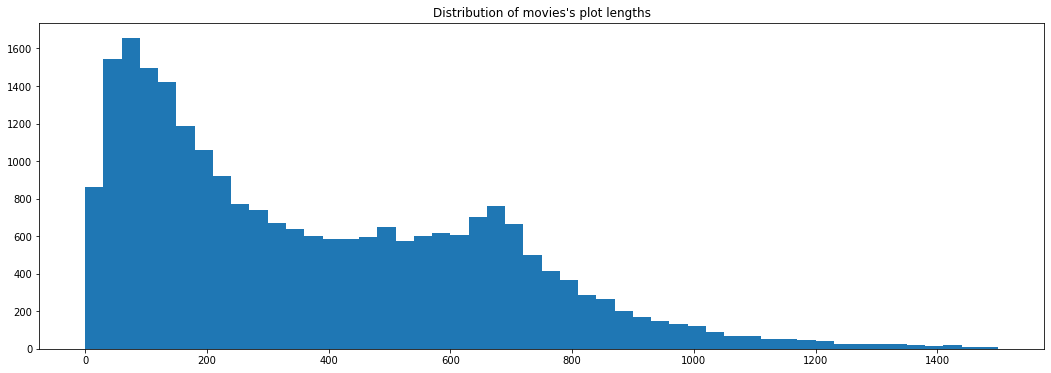

In [14]:
def num_words(text):
    return len(text.split())

plot_lengths = df.Plot.apply(num_words)
print('Some stats for the plot lengths:\n')
print(plot_lengths.describe())

plt.figure(figsize=(18, 6))
plt.hist(plot_lengths, range=(0, 1500), bins=50)
plt.title("Distribution of movies's plot lengths")
plt.show()

In [15]:
# a quick loom at what short plots look like
short_plots = df[plot_lengths < 25].sample(10).Plot
for plot in short_plots:
    print(plot + '\n')

A wild, wealthy woman (Joy) is brought to heel by a sermonizing district attorney after she accidentally hits and kills a motorcycle cop.

Two reporters develop a relationship while investigating an aircraft accident.

Al (Bill Williams) manages a company in a small town from which trucks make regular runs to Fairbanks.

A fashion reporter is united with a former boyfriend, after a chance meeting, and helps him to track down an enemy spy.

Convict 83 is a prisoner on an island, where the harsh regime of the Governor pushes him to lead a revolt.[1]

Kelly's daughter falls for a revenue agent, and his divorced wife is after alimony.

A detective goes undercover by taking a job as a bargee in order to prevent a woman's death.[2]

It deals with a small-town boy, who comes to Calcutta to be a film actor, and gets involved in a modern-day thugee cult.[2]
Cast

Two identical sisters are able to switch places, leading to a series of unfortunate incidents.

A forger's daughter is threatened by 

--------------------------------------------------------------------------------------------------------------------------------
short plots aren't very informative, and it's hard to determine the genre.

In [16]:
# a quick look of what the plot of ~45 words looks like
medium_plots = df[(plot_lengths>40) & (plot_lengths<50)].sample(10).Plot
for plot in medium_plots:
    print(plot + '\n')

Insurance investigator Mike Davies looks into a suspicious fire that burned down a nightclub. He Initially suspects the club's manager, Harry Drayson, but when Davies meets Drayson's niece Stella, she helps him uncover a mob protection scheme responsible for the arson.

Sachin Joshi is a Kabaddi Player who loved a girl and also married her after marriage in first night he will kill his wife and goes to the jail all of the proofs are showing Joshi as killer and the other story revolves around that what happened next

Anthony (Shaam) is an orphan who grows up in a church situated in a coastal village near Tuticorin. The local priest (Rajesh) is his benefactor. Anthony is loving and caring towards the local fishermen and their families who are being exploited by the rowdy Michael (Lal).

Wally Gibbs is sued for breach of promise by his former girlfriend Doris Chattaway. His current fiancée, Jane Elliott, breaks off their engagement. Wally ends up with Doris, and Jane pairs off with Wally'

------------------------------------------------------------------------------------------------------------------------------
Let's cut off all the movies with short (< 40 words) plots. From the histogram above one can see that they constitute only for a small fraction of the total number of movies.

In [17]:
# dropping the rows with short plots
df.drop((df[plot_lengths < 40]).index, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

#### removing stopwords, tokenizing

In [18]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [19]:
stopwords_english = stopwords.words('english')
ps = PorterStemmer()

In [20]:
def preprocess_text(text, stemmer, stopwords_list=stopwords_english):
    """
    Converts to lowercase, removes punctuation and stopwords, tokenizes, stems the words. 
    Returns the list of tokens.
    """
    
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokenized_text = word_tokenize(text)
    result = []
    for word in tokenized_text:
        if word not in stopwords_list:
            result.append(ps.stem(word))
        
    return result

In [21]:
df['Plot_tokens'] = ''
df['Plot_tokens'] = df.Plot.apply(preprocess_text, stopwords_list=stopwords_english, stemmer=ps)

#### Train and test data

In [22]:
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df, test_size=0.2)

In [23]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df_test.reset_index(inplace=True)
df_test.drop(['index'], axis=1, inplace=True)

#### Word2Vec, Tf-Idf and Getting vectors for 'Plots'

In [24]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
model = Word2Vec(df['Plot_tokens'], min_count = 25, size = 100, window=6) #change min_count = 25

In [26]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df.Plot)
tfidf_matrix_test = tfidf_vectorizer.transform(df_test.Plot) # should be plot_test
tfidf_matrix = tfidf_vectorizer.transform(df.Plot)

In [27]:
def document2vec(text, text_tokenized, idx, model, vectorizer, tfidf_matrix, vec_dim=100):
    """
    Returns vector representation of text by summing W2V vectors with Tf-Idf weights
    idx stands for the index of text inside of the tfidf_matrix
    """
    doc_vec = np.zeros(vec_dim)
    for word in text_tokenized:
        if word in model.wv.vocab and word in vectorizer.vocabulary_:
            doc_vec += model.wv[word] * tfidf_matrix[idx, vectorizer.vocabulary_[word]]
            
    return doc_vec

In [28]:
# getting vector representations for df_test['Plot'].
plot_vecs = np.empty([df.shape[0], 100]) 
for i in range(df.shape[0]):
    plot_vecs[i] = document2vec(text=df.Plot[i], text_tokenized=df['Plot_tokens'][i], 
                               idx=i, model=model, vectorizer=tfidf_vectorizer, 
                               tfidf_matrix=tfidf_matrix)

plot_vecs_test = np.empty([df_test.shape[0], 100]) 
for i in range(df_test.shape[0]):
    plot_vecs_test[i] = document2vec(text=df_test.Plot[i], text_tokenized=df_test['Plot_tokens'][i], 
                               idx=i, model=model, vectorizer=tfidf_vectorizer, 
                               tfidf_matrix=tfidf_matrix_test)

#### classification

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [30]:
genres = ['action', 'adventure', 'children', 'comedy', 'crime', 'drama',
          'fantasy', 'horror', 'romance', 'scifi', 'thriller']

In [31]:
accuracies = {}
for genre in genres:
    clf = LinearSVC(max_iter=10000)
    clf.fit(plot_vecs, y=df[genre])
    y_pred = clf.predict(plot_vecs_test)    
    accuracies[genre] = accuracy_score(y_pred=y_pred, y_true=df_test[genre])

C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

In [32]:
for key, val in zip(accuracies.keys(), accuracies.values()):
    print('accuracy for ', key, ':', val)

accuracy for  action : 0.8904931141714794
accuracy for  adventure : 0.9646823633940471
accuracy for  children : 0.998223011994669
accuracy for  comedy : 0.6945801865837405
accuracy for  crime : 0.9224788982674367
accuracy for  drama : 0.6259440248778321
accuracy for  fantasy : 0.9733451799200356
accuracy for  horror : 0.9284762327854287
accuracy for  romance : 0.8922701021768104
accuracy for  scifi : 0.962239004886717
accuracy for  thriller : 0.9164815637494447
